In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import numpy as np

In [4]:
t = np.linspace(0, 2*np.pi, 40)

In [5]:
def spiro(a, b, h):
    def f(t):
        x = (a-b)*np.cos(t) + h * np.cos(t*(a-b)/b)
        y = (a-b)*np.sin(t) - h * np.sin(t*(a-b)/b)
        return x, y
    return f

In [6]:
maximum_extent = 3 + 2 * np.random.rand()
b = 0.1 + np.random.rand()
h = 0.5 + 2 * np.random.rand()
a = maximum_extent + b -h
col_init = .6 * np.random.rand(3)
col_fin = .4 + .6 * np.random.rand(3)

(-4.0, 4.0, -4.0, 4.0)

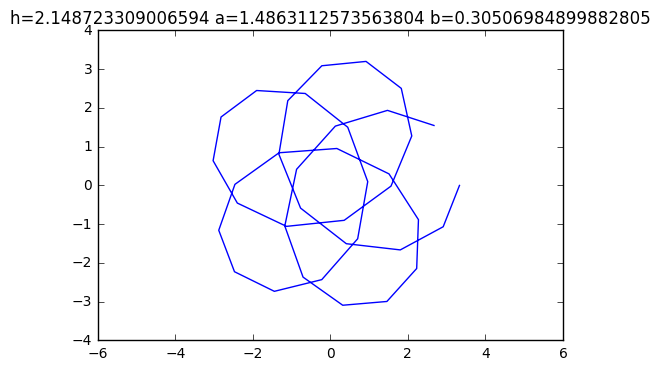

In [7]:
simple = spiro(h=h,a=a,b=b)
x, y = simple(t)
plt.plot(x,y)
plt.title("h={} a={} b={}".format(h,a,b))
plt.axis('equal')

In [8]:
grid = np.stack(np.meshgrid(np.linspace(-6, 6, 32), np.linspace(-6, 6, 32)))

In [9]:
centres = np.stack([x, y], axis=1)

In [10]:
d = ((grid - centres[:, :, np.newaxis, np.newaxis])**2).sum(1)

In [11]:
sigma = .25 + .75 * np.random.rand()

In [12]:
weights = np.exp(-d/sigma)

In [13]:
y = weights.mean(0)
y = y / y.max()

In [14]:
y.max()

1.0

In [15]:
rgb = y[:, :, np.newaxis] * col_fin + (1 - y[:, :, np.newaxis]) * col_init

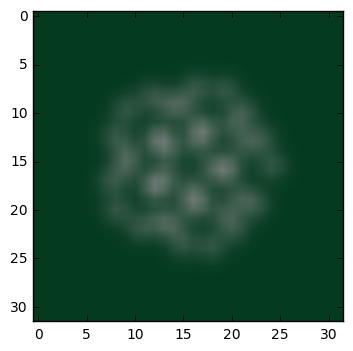

In [16]:
plt.imshow(rgb)